<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/IndividualParties/Congress3Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 216 (delta 76), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (216/216), 16.71 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-09-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#CongressMukTBharat")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('cong.csv') 

RT @Neel_AOL: #POTUS #PresidentOfTheUnitedStates

@RiaRevealed thinks @POTUS left 
America

I wish not only #GodBlessAmerica 
But also #God…
<--------------------------------------------------->
1
@proton05860685 @HinduNatl @narendramodi @AmitShah @PMOIndia @AmitShahOffice @rashtrapatibhvn @GeneralBakshi… https://t.co/ixojNK5dT2
<--------------------------------------------------->
2
@INC_GPCC @narendramodi @JoeBiden RGF funds enquiry when
#congressmuktbharat 
#jaisriram https://t.co/lnYezLVKIS
<--------------------------------------------------->
3
@INC_GPCC @narendramodi @JoeBiden What do u want
#congressmuktbharat https://t.co/vxq7ZYR1NI
<--------------------------------------------------->
4
@INC_GPCC @narendramodi @JoeBiden U r life is waste.
Bharath how much colapsed by 
#congressmuktbharat https://t.co/op9lBgv9Jp
<--------------------------------------------------->
5
RT @Neel_AOL: #POTUS #PresidentOfTheUnitedStates

@RiaRevealed thinks @POTUS left 
America

I wish not only #God

# **Importing Libraries**


In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING CONGRESS DATASET 3**

In [ ]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

598



> **Removing duplicates tweets if any.**



In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

131

In [ ]:
df['Tweet'].duplicated().sum()

467

```
Number of duplicates tweets
```



In [ ]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(131, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [ ]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

36

In [ ]:
df.shape

(95, 2)

In [ ]:
df['Processed_Tweet']

1      @proton05860685 @HinduNatl @narendramodi @Amit...
2      @INC_GPCC @narendramodi @JoeBiden RGF funds en...
3      @INC_GPCC @narendramodi @JoeBiden What do u wa...
4      @INC_GPCC @narendramodi @JoeBiden U r life is ...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125    @sureshseshadri1 @DrBosch3 @IndianRajeshNCo @O...
126    Maybe modiji needs congress mukt bharat before...
127    @timesofindia @RahulGandhi there wouldn't be a...
129    #SushantSinghRajput murdered\n#DishaSaliyan mu...
130     @TajinderBagga #CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object



>**Removing username**



In [ ]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

1                                https://t.co/ixojNK5dT2
2            RGF funds enquiry when\n#congressmuktbha...
3            What do u want\n#congressmuktbharat http...
4            U r life is waste.\nBharath how much col...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125                              https://t.co/np2N4MWtEH
126    Maybe modiji needs congress mukt bharat before...
127        there wouldn't be a case of migrants if Co...
129    #SushantSinghRajput murdered\n#DishaSaliyan mu...
130                    #CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object



> **Removing URL, if any**



In [ ]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

1                                                       
2            RGF funds enquiry when\n#congressmuktbha...
3                   What do u want\n#congressmuktbharat 
4            U r life is waste.\nBharath how much col...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125                                                     
126    Maybe modiji needs congress mukt bharat before...
127        there wouldn't be a case of migrants if Co...
129    #SushantSinghRajput murdered\n#DishaSaliyan mu...
130                    #CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object



> **Removing Hashtags but keeping the word**



In [ ]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

1                                                       
2            RGF funds enquiry when\ncongressmuktbhar...
3                    What do u want\ncongressmuktbharat 
4            U r life is waste.\nBharath how much col...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125                                                     
126    Maybe modiji needs congress mukt bharat before...
127        there wouldn't be a case of migrants if Co...
129    SushantSinghRajput murdered\nDishaSaliyan murd...
130                     CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object



> **Using Preprocessor library**



In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

1                                                       
2      RGF funds enquiry whencongressmuktbharat jaisr...
3                       What do u wantcongressmuktbharat
4      U r life is waste.Bharath how much colapsed by...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125                                                     
126    Maybe modiji needs congress mukt bharat before...
127    there wouldn't be a case of migrants if Congre...
129    SushantSinghRajput murderedDishaSaliyan murder...
130                     CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [ ]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

1                                                       
2      RGF funds enquiry whencongressmuktbharat jaisr...
3                       What do u wantcongressmuktbharat
4      U r life is waste Bharath how much colapsed by...
5      Youth Leader Rahul Ghandy ji has been coming a...
                             ...                        
125                                                     
126    Maybe modiji needs congress mukt bharat before...
127    there wouldn t be a case of migrants if Congre...
129    SushantSinghRajput murderedDishaSaliyan murder...
130                     CongressMuktBharat only Solution
Name: Processed_Tweet, Length: 95, dtype: object

> **Converting to lowercase**

In [ ]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

1                                                       
2      rgf funds enquiry whencongressmuktbharat jaisr...
3                       what do u wantcongressmuktbharat
4      u r life is waste bharath how much colapsed by...
5      youth leader rahul ghandy ji has been coming a...
                             ...                        
125                                                     
126    maybe modiji needs congress mukt bharat before...
127    there wouldn t be a case of migrants if congre...
129    sushantsinghrajput murdereddishasaliyan murder...
130                     congressmuktbharat only solution
Name: Processed_Tweet, Length: 95, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["doesn't", 't', 'if', 'where', 'under', 'we', 'through', 'an', "hadn't", 'couldn', "mustn't", 'while', 'off', 'their', 'this', 'as', 'then', 'for', 'most', 'at', 'can', 'weren', 'against', 'are', 'themselves', 'in', 'out', "mightn't", 've', "won't", 'isn', "didn't", "that'll", "weren't", 'her', 'how', 'yourself', 'on', 'don', 'any', 'you', 'until', 'your', 'myself', 'having', 'who', 'am', 'will', 'hasn', 'be', 'because', 'didn', "don't", 'each', 'herself', 'had', "you'll", 'me', 'these', 'nor', 'does', 'and', 'they', 'doing', 'o', 'own', 'y', 'now', 'that', 'what', 'too', 'further', 'below', 'yours', 'those', 'she', 'won', 'd', 'being', 'with', 'before', 'mightn', 'during', 'more', 'same', 'ourselves', 'was', 'been', 'the', 'its', "shouldn't", "haven't", 'which', 'from', 'ours', 'down', 'it', 'm', 'ma', 'my', "it's", 'theirs', 'ain', 'above', "couldn't", "wasn't", 'why', 'of', 'i', 'doesn', 'he', 'll', 're', 'do', 'than', "you're", 'so', 'haven', 'has', "she's", 'not', 'only', 'itself

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

1                                                       
2      rgf funds enquiry whencongressmuktbharat jaisr...
3                               u wantcongressmuktbharat
4      u r life waste bharath much colapsed congressm...
5      youth leader rahul ghandy ji coming going year...
                             ...                        
125                                                     
126    maybe modiji needs congress mukt bharat next e...
127    case migrants congress would done justice term...
129    sushantsinghrajput murdereddishasaliyan murder...
130                          congressmuktbharat solution
Name: Processed_Tweet, Length: 95, dtype: object



> **Tokenizing**



In [ ]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

1                                                     []
2      [rgf, funds, enquiry, whencongressmuktbharat, ...
3                            [u, wantcongressmuktbharat]
4      [u, r, life, waste, bharath, much, colapsed, c...
5      [youth, leader, rahul, ghandy, ji, coming, goi...
                             ...                        
125                                                   []
126    [maybe, modiji, needs, congress, mukt, bharat,...
127    [case, migrants, congress, would, done, justic...
129    [sushantsinghrajput, murdereddishasaliyan, mur...
130                       [congressmuktbharat, solution]
Name: Processed_Tweet, Length: 95, dtype: object



> **Stemming**



In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

1                                                     []
2      [rgf, fund, enquiri, whencongressmuktbharat, j...
3                            [u, wantcongressmuktbharat]
4      [u, r, life, wast, bharath, much, colaps, cong...
5      [youth, leader, rahul, ghandi, ji, come, go, y...
                             ...                        
125                                                   []
126    [mayb, modiji, need, congress, mukt, bharat, n...
127    [case, migrant, congress, would, done, justic,...
129    [sushantsinghrajput, murdereddishasaliyan, mur...
130                          [congressmuktbharat, solut]
Name: Processed_Tweet, Length: 95, dtype: object

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
1,@proton05860685 @HinduNatl @narendramodi @Amit...,[]
2,@INC_GPCC @narendramodi @JoeBiden RGF funds en...,"[rgf, fund, enquiri, whencongressmuktbharat, j..."
3,@INC_GPCC @narendramodi @JoeBiden What do u wa...,[wantcongressmuktbharat]
4,@INC_GPCC @narendramodi @JoeBiden U r life is ...,"[life, wast, bharath, much, colaps, congressmu..."
5,Youth Leader Rahul Ghandy ji has been coming a...,"[youth, leader, rahul, ghandi, come, year, poi..."
...,...,...
125,@sureshseshadri1 @DrBosch3 @IndianRajeshNCo @O...,[]
126,Maybe modiji needs congress mukt bharat before...,"[mayb, modiji, need, congress, mukt, bharat, n..."
127,@timesofindia @RahulGandhi there wouldn't be a...,"[case, migrant, congress, would, done, justic,..."
129,#SushantSinghRajput murdered\n#DishaSaliyan mu...,"[sushantsinghrajput, murdereddishasaliyan, mur..."


In [ ]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

684

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

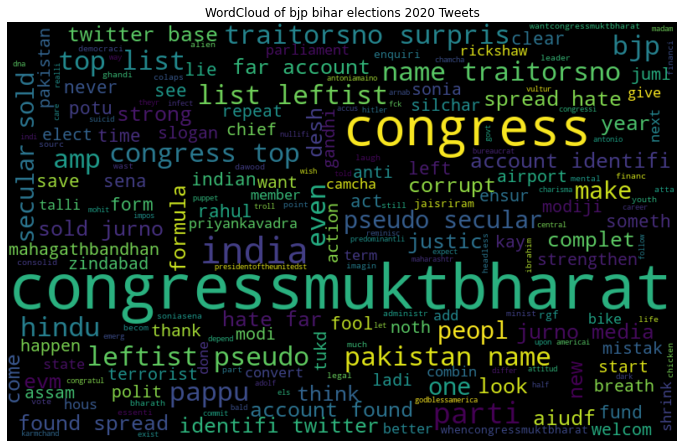

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

95

In [ ]:
df['Processed_Tweet']

1                                                     []
2      [rgf, fund, enquiri, whencongressmuktbharat, j...
3                               [wantcongressmuktbharat]
4      [life, wast, bharath, much, colaps, congressmu...
5      [youth, leader, rahul, ghandi, come, year, poi...
                             ...                        
125                                                   []
126    [mayb, modiji, need, congress, mukt, bharat, n...
127    [case, migrant, congress, would, done, justic,...
129    [sushantsinghrajput, murdereddishasaliyan, mur...
130                          [congressmuktbharat, solut]
Name: Processed_Tweet, Length: 95, dtype: object

In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 22
Negative Tweets: 17
Neutral Tweets 56




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.000,0.0,0.00
1,0.000,1.000,0.0,0.00
2,0.000,1.000,0.0,0.00
3,0.000,1.000,0.0,0.00
4,0.000,1.000,0.0,0.00
...,...,...,...,...
90,0.000,0.000,0.0,0.00
91,0.000,1.000,0.0,0.00
92,0.000,1.000,0.0,0.00
93,0.444,0.556,0.0,-0.34


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.0,0.0,0.0,Neutral
1,0.0,1.0,0.0,0.0,Neutral
2,0.0,1.0,0.0,0.0,Neutral
3,0.0,1.0,0.0,0.0,Neutral
4,0.0,1.0,0.0,0.0,Neutral


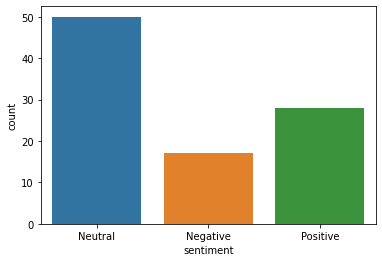

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)